<a href="https://colab.research.google.com/github/yashanecha/DeepFace-Classifier/blob/Sub/Data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install umap-learn plotly

In [ ]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from google.colab import files
import cv2

ModuleNotFoundError: No module named 'facenet_pytorch'

In [ ]:
lfw_dataset_path = "/content/drive/MyDrive/lfw-deepfunneled"

In [ ]:
lfw_people = fetch_lfw_people(data_home=lfw_dataset_path, resize=0.4, min_faces_per_person=50)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

In [ ]:
print("Feature matrix shape:", X.shape)
print("Number of classes:", len(target_names))

Feature matrix shape: (1560, 1850)
Number of classes: 12


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Reduce dimensionality with PCA
n_components = 150  # Adjust based on your GPU/CPU capabilities
print("Performing PCA...")
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Performing PCA...


In [ ]:
# Train a classifier
print("Training the SVM classifier...")
clf = SVC(kernel='rbf', class_weight='balanced', probability=True)
clf.fit(X_train_pca, y_train)


Training the SVM classifier...


SVC(class_weight='balanced', probability=True)

In [ ]:
# Evaluate the classifier
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=target_names))

Model accuracy: 0.80
                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.69      0.79        16
     Colin Powell       0.61      0.97      0.75        66
  Donald Rumsfeld       0.71      0.74      0.73        27
    George W Bush       0.88      0.81      0.85       140
Gerhard Schroeder       0.86      0.79      0.83        24
      Hugo Chavez       1.00      0.59      0.74        17
   Jacques Chirac       1.00      0.30      0.46        10
    Jean Chretien       1.00      0.71      0.83        14
    John Ashcroft       0.93      0.81      0.87        16
Junichiro Koizumi       1.00      0.73      0.84        11
  Serena Williams       1.00      0.67      0.80         9
       Tony Blair       0.79      0.85      0.82        40

         accuracy                           0.80       390
        macro avg       0.89      0.72      0.77       390
     weighted avg       0.84      0.80      0.80       390



In [ ]:
# Save PCA and SVM model to files for later use
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca, f)

with open("svm_model.pkl", "wb") as f:
    pickle.dump(clf, f)

print("Models saved: 'pca_model.pkl' and 'svm_model.pkl'")

Models saved: 'pca_model.pkl' and 'svm_model.pkl'


In [ ]:
def predict_face(image_path):
    # Load PCA and model
    with open("pca_model.pkl", "rb") as f:
        loaded_pca = pickle.load(f)
    with open("svm_model.pkl", "rb") as f:
        loaded_model = pickle.load(f)

    # Load and preprocess the input image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, lfw_people.images[0].shape)  # Resize to match training images
    img_data = img.flatten().reshape(1, -1)  # Flatten the image
    img_data_pca = loaded_pca.transform(img_data)  # Apply PCA transformation

    # Predict
    prediction = loaded_model.predict(img_data_pca)
    predicted_label = target_names[prediction[0]]

    # Display the image with prediction
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))  # Display in RGB
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

Saving Warren_Buffett_0002.jpg to Warren_Buffett_0002.jpg


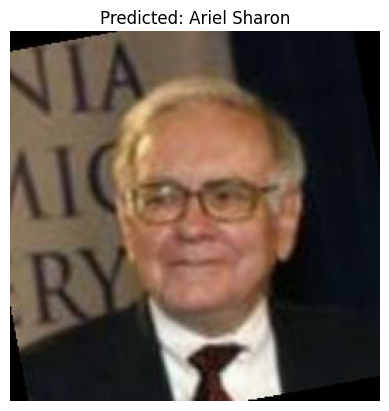

In [ ]:

# Allow the user to upload an image and make a prediction
uploaded = files.upload()
for filename in uploaded.keys():
    predict_face(filename)

In [ ]:
# checking the data distribution

from collections import Counter
label_counts = Counter(y_train)
print(label_counts)


Counter({3: 390, 1: 170, 11: 104, 2: 94, 4: 85, 0: 61, 5: 54, 9: 49, 10: 43, 6: 42, 7: 41, 8: 37})


In [ ]:
clf = SVC(kernel='rbf', class_weight='balanced', probability=True)

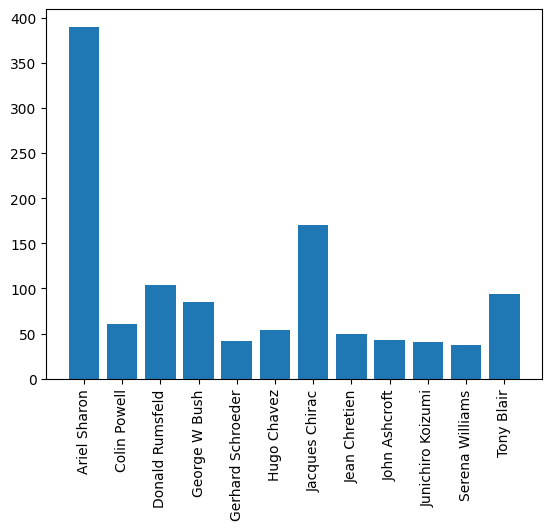

In [ ]:
# Seeing the traing data
plt.bar(range(len(target_names)), label_counts.values())
plt.xticks(range(len(target_names)), target_names, rotation=90)
plt.show()

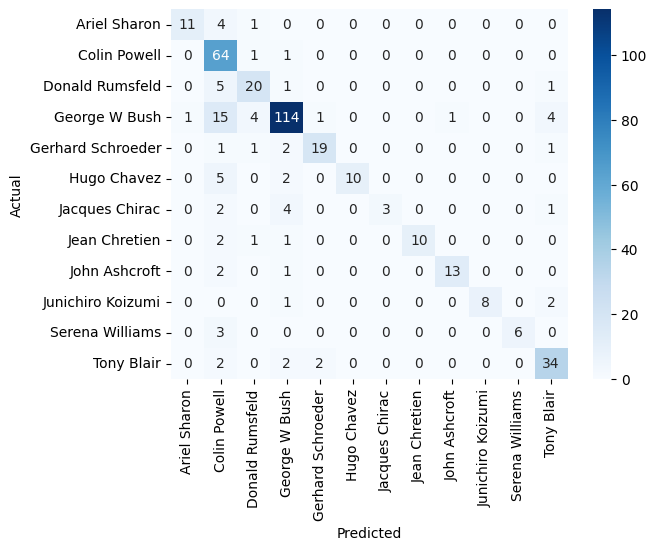

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Class Distribution in Training Set: Counter({3: 390, 1: 170, 11: 104, 2: 94, 4: 85, 0: 61, 5: 54, 9: 49, 10: 43, 6: 42, 7: 41, 8: 37})


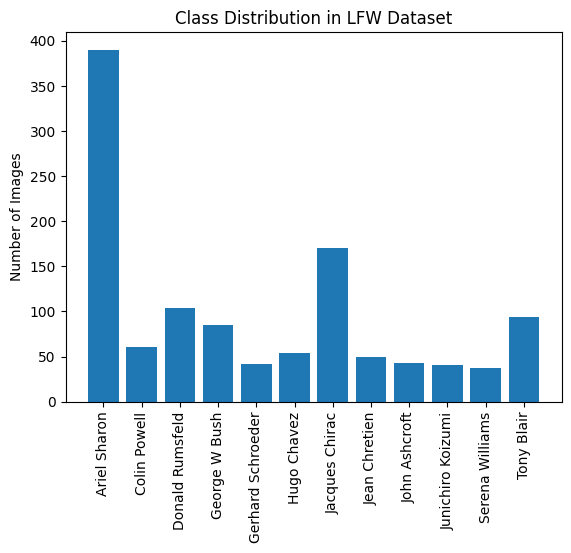

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

label_counts = Counter(y_train)
print("Class Distribution in Training Set:", label_counts)

# Visualize class distribution
plt.bar(range(len(target_names)), label_counts.values())
plt.xticks(range(len(target_names)), target_names, rotation=90)
plt.title("Class Distribution in LFW Dataset")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
clf = SVC(kernel='rbf', class_weight='balanced', probability=True)
#Train with class_weight='balanced' in the SVM to account for imbalance

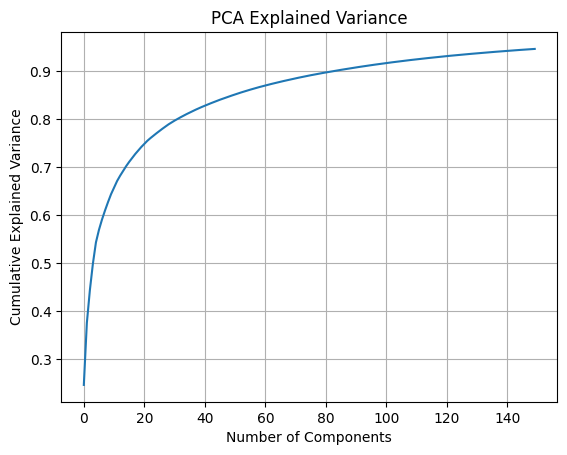

Optimal PCA components: 1


In [ ]:
# Optimize PCA Components
#The number of PCA components significantly impacts the model's ability to generalize.
#Too few components may lead to underfitting, and too many can lead to overfitting.


explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

# Choose the number of components that explains ~95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal PCA components: {n_components}")

In [ ]:
# Updating the PCA with n componets
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       0.28      0.14      0.18        66
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.27      0.02      0.04       140
Gerhard Schroeder       0.00      0.00      0.00        24
      Hugo Chavez       0.13      0.24      0.17        17
   Jacques Chirac       0.10      0.10      0.10        10
    Jean Chretien       0.05      0.50      0.09        14
    John Ashcroft       0.05      0.12      0.07        16
Junichiro Koizumi       0.00      0.00      0.00        11
  Serena Williams       0.31      0.89      0.46         9
       Tony Blair       0.13      0.30      0.19        40

         accuracy                           0.12       390
        macro avg       0.11      0.19      0.11       390
     weighted avg       0.18      0.12      0.09       390



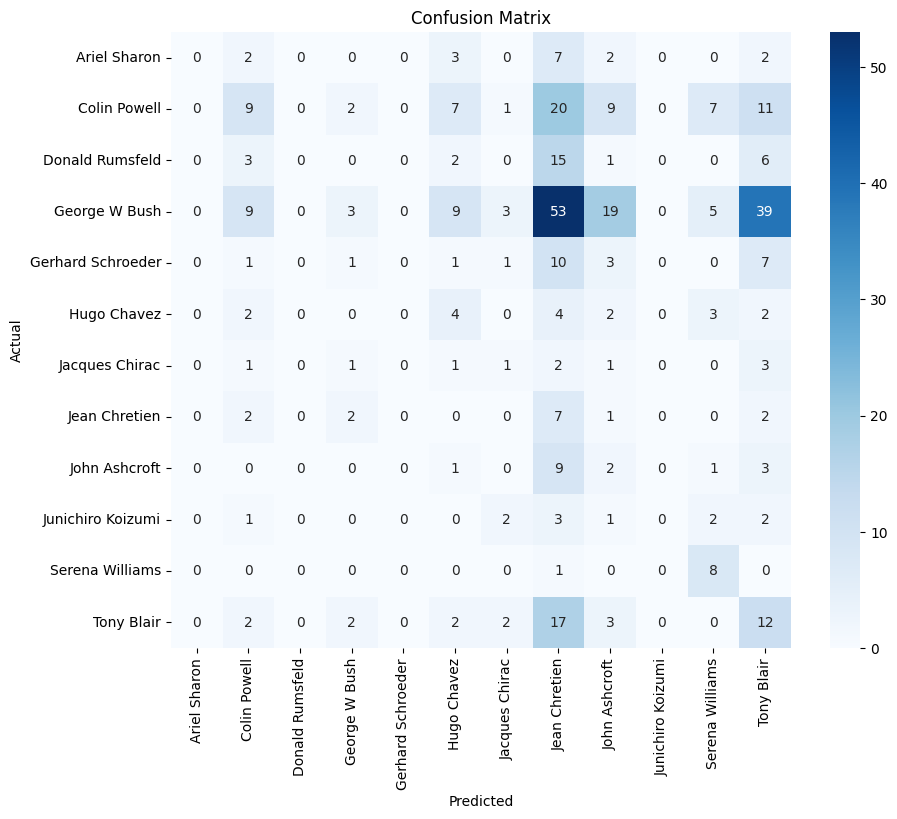

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

# Classification Report
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def predict_face(image_path):
    # Load PCA and model
    with open(pca_path, 'rb') as f:
        loaded_pca = pickle.load(f)
    with open(model_path, 'rb') as f:
        loaded_model = pickle.load(f)

    # Read the input image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Match training data format
    img = cv2.resize(img, lfw_people.images[0].shape)  # Resize to training dimensions
    img_data = img.flatten().reshape(1, -1)  # Flatten to match the training feature format
    img_data_pca = loaded_pca.transform(img_data)  # Apply PCA

    # Predict
    prediction = loaded_model.predict(img_data_pca)
    predicted_label = target_names[prediction[0]]

    # Display prediction
    plt.imshow(cv2.imread(image_path, cv2.IMREAD_COLOR)[:, :, ::-1])  # Display in RGB
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

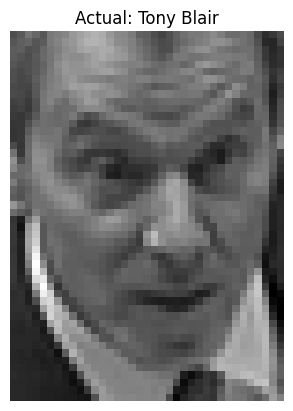

Predicted Label: Serena Williams


In [ ]:
# Test with a known image from the dataset
# Manual testing
test_idx = 0  # Change index to test other images
plt.imshow(lfw_people.images[test_idx], cmap='gray')
plt.title(f"Actual: {target_names[y[test_idx]]}")
plt.axis('off')
plt.show()

# Predict using the same image
img_data = X[test_idx].reshape(1, -1)
img_data_pca = pca.transform(img_data)
predicted_label = target_names[clf.predict(img_data_pca)[0]]
print(f"Predicted Label: {predicted_label}")